# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [31]:
# import everything we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [6]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above

df = pd.read_csv("boston.csv")
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Data Visualization

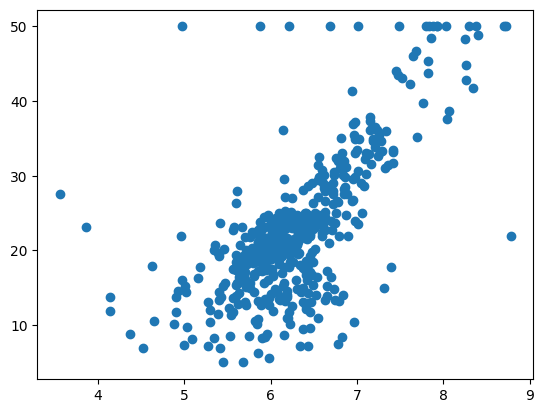

In [17]:
# We can see that feature 'RM', average number of rooms per dwelling,
# has a linear relationship with our target 'MEDV', Median value of owner-occupied homes in $1000's
plt.scatter(df.RM,df.MEDV)
plt.show()


## Model Training

In [11]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [19]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame

rooms = df[['RM']]
median = df[['MEDV']]


In [20]:
# We need 2D arrays for x_train 
x_train, x_test, y_train, y_test = train_test_split(rooms,median,test_size=0.2, random_state=42)


In [24]:
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept
linReg = LinearRegression()
linReg.fit(x_train,y_train)

# print the intercept and coefficients
print(linReg.intercept_)
print(linReg.coef_)

[-36.2463189]
[[9.34830141]]


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [37]:
print(linReg.predict(x_test))

[[23.73238293]
 [26.92950201]
 [19.68456842]
 [20.45112913]
 [22.61993506]
 [22.45166563]
 [19.03953562]
 [21.47009399]
 [21.98425056]
 [20.09589368]
 [19.38542277]
 [19.88088275]
 [ 5.99865516]
 [22.01229547]
 [17.11378553]
 [29.00482492]
 [18.71234507]
 [ 9.37339197]
 [37.37155468]
 [21.5729253 ]
 [22.08708188]
 [24.34937082]
 [17.16052704]
 [25.38703227]
 [19.89957935]
 [14.48691283]
 [18.66560356]
 [26.64905296]
 [19.46955748]
 [17.91773945]
 [15.84241654]
 [23.82586594]
 [32.11780929]
 [13.87927324]
 [19.87153445]
 [17.12313383]
 [30.92122671]
 [18.61886206]
 [20.44178083]
 [22.13382339]
 [14.14102568]
 [27.78019743]
 [38.8579346 ]
 [16.04807917]
 [23.74173123]
 [17.16052704]
 [17.04834742]
 [23.74173123]
 [21.40465588]
 [25.21876285]
 [19.92762425]
 [28.8926453 ]
 [21.17094834]
 [27.14451294]
 [33.58549261]
 [22.76015958]
 [21.89076755]
 [27.89237705]
 [23.47997879]
 [16.15091049]
 [26.96689521]
 [31.519518  ]
 [25.00375192]
 [14.75801358]
 [25.25615606]
 [13.71100382]
 [24.24653

# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [29]:
# we can see the coefficient and intercept our model finds
print(linReg.intercept_)
print(linReg.coef_)

[-36.2463189]
[[9.34830141]]


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

In [32]:
y_pred = linReg.predict(x_test) 
print('r2_score: ',r2_score(y_test, y_pred)) 
# Compare the value with linReg.score().  Is the score the same as model.score?
print('score: ',linReg.score(x_test,y_test))

r2_score:  0.3707569232254778
score:  0.3707569232254778


Plot the regression line (blue) vs the actual value (red)

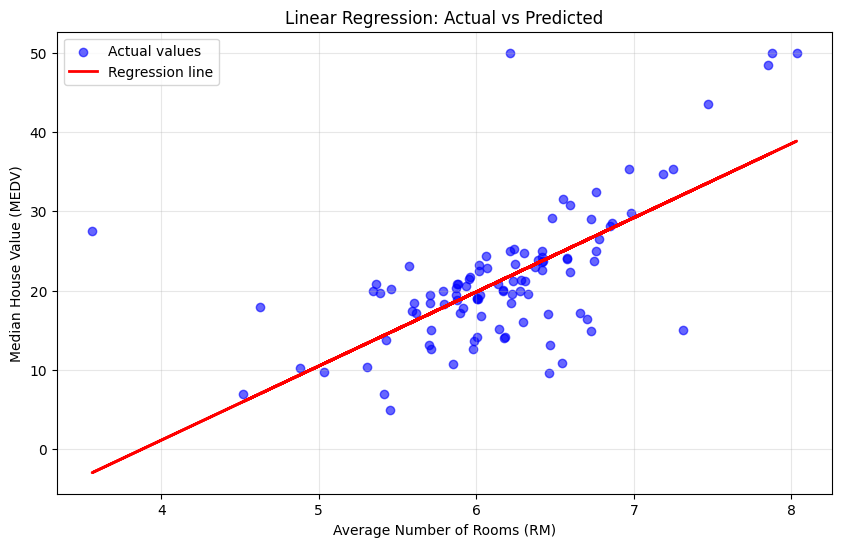

In [38]:
# We want to plot the regression line(blue) vs the actual value(red)
# Get predictions
y_pred = linReg.predict(x_test)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot actual values
plt.scatter(x_test, y_test, color='blue', label='Actual values', alpha=0.6)

# Plot regression line
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression line')

plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Value (MEDV)')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

